In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## Misson 2. 가즈아!

- BitCoin : https://www.kaggle.com/rishidamarla/bitcoin-prices-20112015

### Mandatory Part

- 다음 데이터가 주어졌을 때 2016.6 ~ 2017.6 기간의 **5-MA(Moving Average) 비트코인 가격 그래프**를 그려주세요.

    - 선의 색깔은 **노란색(#f2a900)** 으로 해야합니다.
    - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
    - 이동평균의 기준은 `Open` Column으로 계산합니다.
    - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.

In [2]:
d = pd.read_csv('./BitCoin.csv')

df = pd.DataFrame(d)

df['Date_dt'] = pd.to_datetime(df['Date'])
df1 = df.sort_values('Date_dt')
df1.reset_index(inplace=True, drop=True)

df1.dtypes

Unnamed: 0             int64
Date                  object
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume               float64
Market Cap             int64
Date_dt       datetime64[ns]
dtype: object

In [3]:
df1

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,Date_dt
0,1605,2013-01-05,139.00,139.89,107.72,116.99,8.026719e+06,1542820000,2013-01-05
1,1574,2013-01-06,128.81,129.78,127.20,129.30,7.521960e+06,1445800000,2013-01-06
2,1544,2013-01-07,97.51,97.66,86.30,88.05,5.759986e+06,1107130000,2013-01-07
3,1513,2013-01-08,106.21,108.00,103.01,104.00,6.348195e+06,1220190000,2013-01-08
4,1482,2013-01-09,135.14,145.81,134.81,138.34,8.179728e+06,1572230000,2013-01-09
...,...,...,...,...,...,...,...,...,...
1604,133,2017-12-05,1845.76,1856.15,1694.01,1724.24,7.409840e+08,30131100000,2017-12-05
1605,102,2017-12-06,2953.22,2997.26,2518.56,2659.63,2.569530e+09,48391200000,2017-12-06
1606,72,2017-12-07,2332.77,2423.71,2275.14,2398.84,1.117410e+09,38355900000,2017-12-07
1607,41,2017-12-08,3650.63,3949.92,3613.70,3884.71,2.219590e+09,60242100000,2017-12-08


In [4]:
start = df1.index[df1['Date'] == '2016-06-01'][0]
end = df1.index[df1['Date'] == '2017-05-31'][0]

df_sliced = df1[start-4 : end+1]
df_open = df1[start-4 : end+1]['Open']
df_sliced

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Market Cap,Date_dt
1126,482,2016-05-28,473.03,533.47,472.70,530.04,1.811990e+08,7375780000,2016-05-28
1127,481,2016-05-29,527.48,553.96,512.18,526.23,1.487370e+08,8226500000,2016-05-29
1128,480,2016-05-30,528.47,544.35,522.96,533.86,8.795870e+07,8243960000,2016-05-30
1129,479,2016-05-31,534.19,546.62,520.66,531.39,1.384500e+08,8335100000,2016-05-31
1130,625,2016-06-01,431.86,431.86,426.34,429.11,3.404250e+07,6498830000,2016-06-01
...,...,...,...,...,...,...,...,...,...
1475,118,2017-05-27,2196.27,2260.20,1855.83,2038.87,1.700480e+09,35917100000,2017-05-27
1476,117,2017-05-28,2054.08,2267.34,2054.08,2155.80,1.147140e+09,33595900000,2017-05-28
1477,116,2017-05-29,2159.43,2307.05,2107.17,2255.61,9.946250e+08,35323500000,2017-05-29
1478,115,2017-05-30,2255.36,2301.96,2124.57,2175.47,1.443970e+09,36897000000,2017-05-30


In [5]:
for i in range(start, end+1):
    df_sliced.loc[i, '5-MA'] = df_open.loc[i-4:i+1].sum() / 5

df_MA = df_sliced.loc[start:end+1, '5-MA']
df_MA

C:\Users\wkdcl\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\wkdcl\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


1130     576.324
1131     561.822
1132     541.182
1133     525.076
1134     533.158
          ...   
1475    2706.082
1476    2699.656
1477    2686.454
1478    2634.644
1479    2170.466
Name: 5-MA, Length: 350, dtype: float64

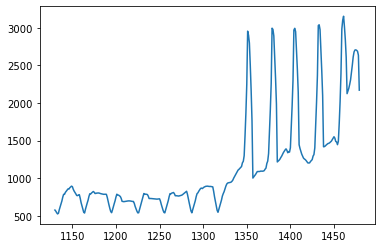

In [8]:
plt1 = plt.plot(df_MA)

plt.show()

### Bonus Part

- ETH_1H, ETH_1min, ETH_day : https://www.kaggle.com/prasoonkottarathil/ethereum-historical-dataset?select=ETH_day.csv

- 위에 주어진 데이터와 더불어 다음 데이터도 주어졌을 때, 2016.6 ~ 2017.6 기간에 해당하는 **비트코인의 5-MA 그래프와 이더리움의 5-MA 그래프를 동시에** 그려주세요.

    - 선의 색깔은 비트코인 : **노란색(#f2a900)**, 이더리움 : **검은색(#3c3c3d)** 으로 해야합니다.
    - x-axis label과 y-axis label은 적절한 텍스트로 추가되어야 합니다.
    - 이동평균의 기준은 `Open` Column으로 계산합니다.
    - 이외에도 그래프를 알아보기 쉽게 하기 위한 정보(Text, Facet 등)을 추가하는 것도 좋습니다.